In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

In [3]:
train=tf.keras.preprocessing.image_dataset_from_directory(r"/content/drive/MyDrive/ML/Knee X-ray Images",image_size=(224,224),batch_size=64,subset="training",seed=42,validation_split=0.2)
val=tf.keras.preprocessing.image_dataset_from_directory(r"/content/drive/MyDrive/ML/Knee X-ray Images",image_size=(224,224),batch_size=64,subset="validation",seed=333,validation_split=0.2)
#test=tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(r"F:\AI instant\ml microsoft\DL\Notebooks - ANN - DNN\8.Xnee X Ray classification\Knee X-ray Images",target_size=(224,224),batch_size=8,shuffle=False)

Found 3456 files belonging to 5 classes.
Using 2765 files for training.
Found 3456 files belonging to 5 classes.
Using 691 files for validation.


In [ ]:
# import numpy as np
# y_true=np.concatenate([y for x,y in test],axis=0)

In [4]:

from keras.models import Sequential,load_model
from keras.layers import Dense,GlobalAveragePooling2D

model_base=tf.keras.applications.efficientnet.EfficientNetB2(include_top=False,weights = "imagenet",input_shape=(224,224,3))

for layer in model_base.layers[100:]:
    layer.trainable=True

model1=Sequential()
model1.add(model_base)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(5,activation="softmax"))

31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
from tensorflow.keras.applications.densenet import DenseNet121

base_model_2= DenseNet121(include_top=False, weights='imagenet',
                                         input_shape=(224,224,3))

for layer in base_model_2.layers[150:]:
    layer.trainable=True

model_2=Sequential()
model_2.add(base_model_2)
model_2.add(GlobalAveragePooling2D())
model_2.add(Dense(5,activation='softmax'))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
from tensorflow.keras.applications.xception import Xception

base_model_3= Xception(include_top=False, weights='imagenet',
                                        input_shape=(224,224,3))

for layer in base_model_3.layers[100:]:
    layer.trainable=True

model_3=Sequential()
model_3.add(base_model_3)
model_3.add(GlobalAveragePooling2D())
model_3.add(Dense(5,activation='softmax'))

In [6]:
def get_callbacks(model_name):
    callbacks =[]
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=f'model_{model_name}.keras', monitor='val_loss',mode='min',save_best_only=True)
    callbacks.append(checkpoint)
    anne = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0000001,min_delta=0.00001,mode='auto')
    callbacks.append(anne)
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)
    callbacks.append(earlystop)
    return callbacks

from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [10]:
model1.compile( loss='sparse_categorical_crossentropy',optimizer= optimizer, metrics=['accuracy'])
model_2.compile( loss='sparse_categorical_crossentropy',optimizer= optimizer, metrics=['accuracy',])
model_3.compile( loss='sparse_categorical_crossentropy',optimizer= optimizer, metrics=['accuracy'],)

In [ ]:
call=get_callbacks("EfficientNetB2")
hist1=model1.fit(train,epochs=50,callbacks=[call],validation_data=val)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 574s 10s/step - accuracy: 0.6259 - loss: 0.9729 - val_accuracy: 0.2923 - val_loss: 3.1406 - learning_rate: 0.0010
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 426ms/step - accuracy: 0.8921 - loss: 0.3073 - val_accuracy: 0.7366 - val_loss: 0.8978 - learning_rate: 0.0010
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 441ms/step - accuracy: 0.9019 - loss: 0.2621 - val_accuracy: 0.7742 - val_loss: 0.8201 - learning_rate: 0.0010
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 397ms/step - accuracy: 0.9453 - loss: 0.1658 - val_accuracy: 0.7308 - val_loss: 1.3732 - learning_rate: 0.0010
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 492ms/step - accuracy: 0.9728 - loss: 0.0802 - val_accuracy: 0.9146 - val_loss: 0.2661 - learning_rate: 0.0010
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 434ms/step - accuracy: 0.9696 - loss: 0.0874 - val_accuracy: 0.9132 - val_loss: 0.2199 - learning_rate: 0.0010
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 401ms/step - accuracy: 0.9577 - loss: 0.1

In [11]:
import matplotlib.pyplot as plt

def visulaization_ACC_loss_VL_Valloss(model_name,name):
     print(name)

     acc = model_name.history['accuracy']
     val_acc = model_name.history['val_accuracy']
     loss = model_name.history['loss']
     val_loss = model_name.history['val_loss']
     epochs = range(1, len(acc) + 1)

     plt.plot(epochs, acc, label='Training accurarcy')
     plt.plot(epochs, val_acc, label='Validation accurarcy')
     plt.title('Training and Validation accurarcy')
     plt.xlabel('Epochs')
     plt.ylabel('Accuracy')
     plt.legend()

     plt.figure()

     plt.plot(epochs, loss,  label='Training loss')
     plt.plot(epochs, val_loss, label='Validation loss')
     plt.title('Training and Validation loss')
     plt.xlabel('Epochs')
     plt.ylabel('Loss')
     plt.legend()
     plt.show()

EfficientNetB2


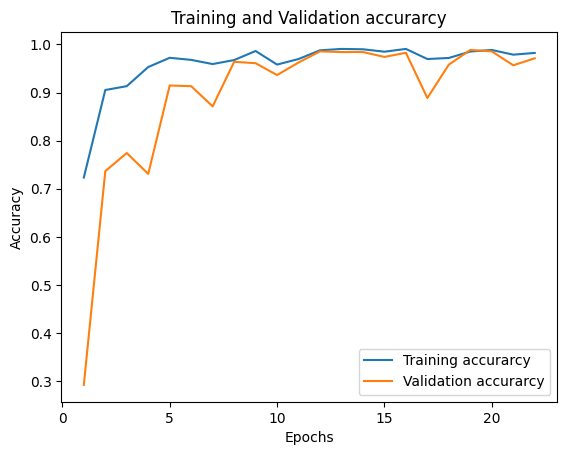

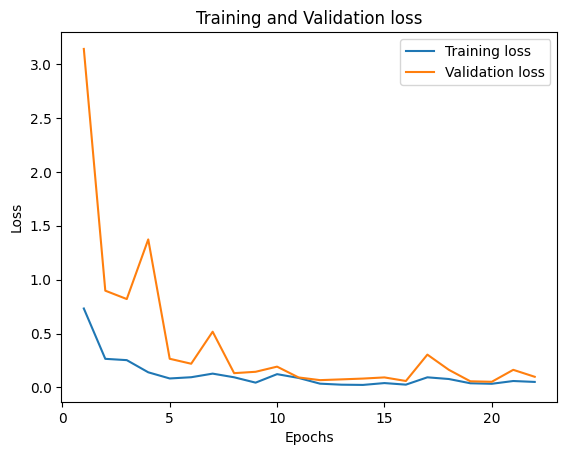

In [ ]:
visulaization_ACC_loss_VL_Valloss(hist1,"EfficientNetB2")

In [ ]:
call=get_callbacks("DenseNet121")
hist2=model_2.fit(train,epochs=35,callbacks=[call],validation_data=val)

Epoch 1/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 343s 4s/step - accuracy: 0.9516 - loss: 0.1362 - val_accuracy: 0.5991 - val_loss: 1.8552 - learning_rate: 0.0010
Epoch 2/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 78s 619ms/step - accuracy: 0.9588 - loss: 0.1227 - val_accuracy: 0.7815 - val_loss: 0.8239 - learning_rate: 0.0010
Epoch 3/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 574ms/step - accuracy: 0.9772 - loss: 0.0623 - val_accuracy: 0.6483 - val_loss: 1.4259 - learning_rate: 0.0010
Epoch 4/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 43s 621ms/step - accuracy: 0.9569 - loss: 0.1140 - val_accuracy: 0.8191 - val_loss: 0.6269 - learning_rate: 0.0010
Epoch 5/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 40s 603ms/step - accuracy: 0.9863 - loss: 0.0594 - val_accuracy: 0.7511 - val_loss: 0.8967 - learning_rate: 0.0010
Epoch 6/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 42s 631ms/step - accuracy: 0.9882 - loss: 0.0370 - val_accuracy: 0.7800 - val_loss: 0.7869 - learning_rate: 0.0010
Epoch 7/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 577ms/step - accuracy: 0.9838 - loss: 0.04

DenseNet121


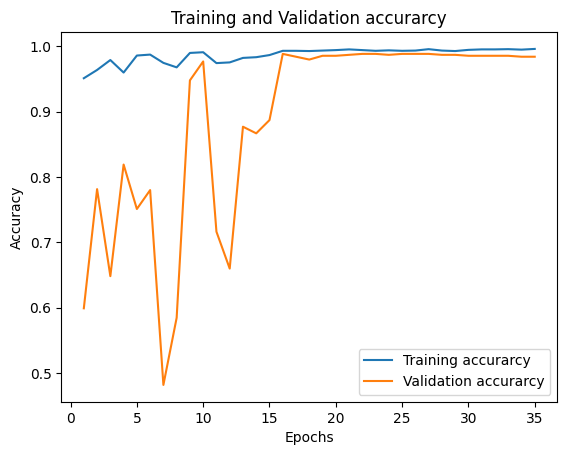

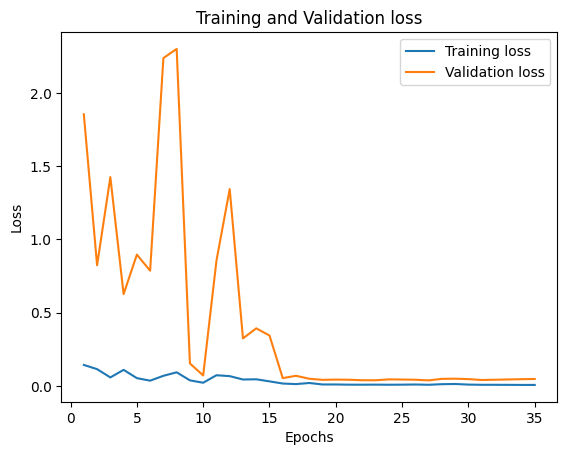

In [ ]:
visulaization_ACC_loss_VL_Valloss(hist2,"DenseNet121")

In [12]:

call=get_callbacks("Xception")
hist_3=model_3.fit(train,epochs=35,callbacks=[call],validation_data=val)

Epoch 1/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 495s 9s/step - accuracy: 0.6196 - loss: 0.9803 - val_accuracy: 0.2996 - val_loss: 9.6661 - learning_rate: 0.0010
Epoch 2/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8681 - loss: 0.3855 - val_accuracy: 0.4515 - val_loss: 3.7697 - learning_rate: 0.0010
Epoch 3/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8939 - loss: 0.3319 - val_accuracy: 0.8249 - val_loss: 0.6104 - learning_rate: 0.0010
Epoch 4/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9183 - loss: 0.2783 - val_accuracy: 0.7902 - val_loss: 0.5909 - learning_rate: 0.0010
Epoch 5/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9518 - loss: 0.1461 - val_accuracy: 0.6093 - val_loss: 2.6737 - learning_rate: 0.0010
Epoch 6/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9507 - loss: 0.1426 - val_accuracy: 0.8365 - val_loss: 0.5769 - learning_rate: 0.0010
Epoch 7/35
44/44 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9754 - loss: 0.0862 - val_accuracy:

Xception


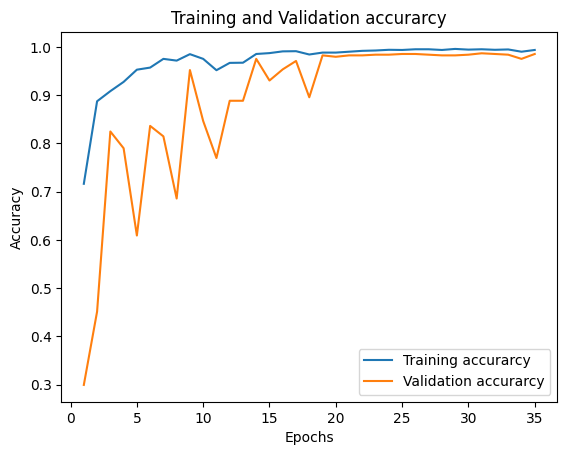

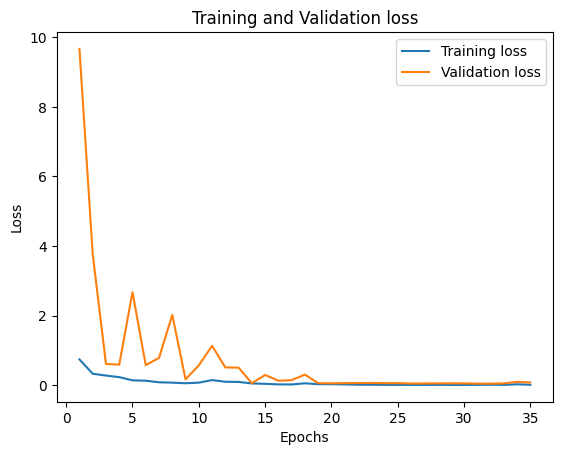

In [14]:
visulaization_ACC_loss_VL_Valloss(hist_3,"Xception")

In [13]:
import numpy as np
y_true=np.concatenate([y for x,y in val],axis=0)

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
target_names=["Normal "," Doubtful","Mild","Moderate","Severe"]
def evaluation(y_true,y_pred):
    print(classification_report(y_true, y_pred, target_names=target_names, digits=4))
    disp = confusion_matrix(y_true, y_pred)
    disp.astype('int')
    pd.options.display.float_format = '{:.5f}'.format
    df_cm = pd.DataFrame(disp, target_names, target_names)

    fig, ax = plt.subplots(figsize=(4,4))

    sn.heatmap(df_cm, annot=True, annot_kws={"size": 15},ax=ax, cmap="YlOrBr" , fmt='g',cbar=False) # font size
    plt.ylabel('Actual',fontsize=20)
    plt.xlabel('Predicted',fontsize=20)
    plt.ioff()
    plt.savefig("confusion_mat", bbox_inches='tight')